# K-Means

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path
import pandas as pd

datadir = "data"

In [111]:
# initialize data
data1 = np.array([[1,2],[1,3],[1,5],[2,3],[2,1],[6,7],[5,6],[5,9],[7,6],[8,6]])
print(data1)

[[1 2]
 [1 3]
 [1 5]
 [2 3]
 [2 1]
 [6 7]
 [5 6]
 [5 9]
 [7 6]
 [8 6]]


In [112]:
def kmeans(data, k):
    # Initialization
    centers = np.zeros((k,data.shape[1]))
    new_centers = centers
    distances = np.ones((k,data.shape[0]))

    sample_indices = np.random.choice(data.shape[0], k, replace=False)
    centers = data[sample_indices]
    print("Centers:\n", centers, "\n")

    # Learning
    for _ in range(20):
        # Compute Distances
        for x in range(k):
            for y in range(0,data.shape[0]):
                distance = np.linalg.norm(centers[x] - data[y])
                distances[x][y] = distance
        # print("Distances:\n", distances)

        # Identify closest clusters
        clusters = np.argmin(distances,axis=0)
        # print("Clusters:\n", clusters)

        # Update centers
        for z in range(k):
            new_centers[z] = np.array(data[clusters == z].mean(axis=0))
        print("New Centers:\n", new_centers, "\n")

        # Check for repeat centers
        does_array_repeat = centers == new_centers
        if np.all(does_array_repeat) == True:
            break

        centers = new_centers

    return centers, clusters


centers, clusters = kmeans(data1, 2)

Centers:
 [[6 7]
 [7 6]] 

New Centers:
 [[3.         5.        ]
 [5.66666667 4.33333333]] 

New Centers:
 [[2.         3.83333333]
 [6.5        6.25      ]] 



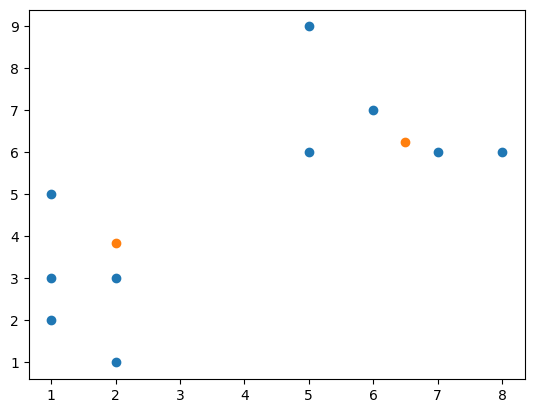

In [113]:
plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(centers[:, 0], centers[:, 1])

plt.show()

In [114]:
def readData(filepath):
    file = open(filepath, 'r')

    LoL = []

    for line in file:
        vals = line.strip().split(',')
        temp_list = []
        for val in vals:
            temp_list.append(val)
        LoL.append(temp_list)

    file.close()

    return LoL

In [115]:
listOfLists = readData(os.path.join(datadir, "financials.csv"))

In [133]:
financialsDF = pd.DataFrame(listOfLists)

financialsDF


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,None
1,MMM,3M Company,Industrials,222.89,24.31,2.3328617,7.92,259.77,175.49,138721055226.00,9048000000.00,4.3902707,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...,None
2,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.1479592,1.7,68.39,48.925,10783419933.00,601000000.00,3.5754826,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...,None
3,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.9089824,0.26,64.6,42.28,102121042306.00,5744000000.00,3.7404804,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...,None
4,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.4995599,3.29,125.86,60.05,181386347059.00,10310000000.00,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,XYL,Xylem Inc.,Industrials,70.24,30.94,1.1700794,1.83,76.81,46.86,12915021000.00,722000000.00,2.7262094,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...,None
502,YUM,Yum! Brands Inc,Consumer Discretionary,76.3,27.25,1.7970798,4.07,86.93,62.85,27003303098.00,2289000000.00,6.3136363,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...,None
503,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.7948336,9.01,133.49,108.17,24454698119.00,2007400000.00,3.1648953,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...,None
504,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.6,55.61,38.43,10670678640.00,0.00,3.7945793,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...,None


In [146]:
financialsDFClean = financialsDF.copy()

financialsDFClean.drop([2,7,8,10,11,12,13,14], axis=1, inplace=True)

financialsDFClean

,0,1,3,4,5,6,9
0,Symbol,Name,Price,Price/Earnings,Dividend Yield,Earnings/Share,Market Cap
1,MMM,3M Company,222.89,24.31,2.3328617,7.92,138721055226.00
2,AOS,A.O. Smith Corp,60.24,27.76,1.1479592,1.7,10783419933.00
3,ABT,Abbott Laboratories,56.27,22.51,1.9089824,0.26,102121042306.00
4,ABBV,AbbVie Inc.,108.48,19.41,2.4995599,3.29,181386347059.00
...,...,...,...,...,...,...,...
501,XYL,Xylem Inc.,70.24,30.94,1.1700794,1.83,12915021000.00
502,YUM,Yum! Brands Inc,76.3,27.25,1.7970798,4.07,27003303098.00
503,ZBH,Zimmer Biomet Holdings,115.53,14.32,0.7948336,9.01,24454698119.00
504,ZION,Zions Bancorp,50.71,17.73,1.480933,2.6,10670678640.00


In [147]:
financialsDFClean.drop([0,1,4,5,6], axis=1, inplace=True)
financialsDFClean.drop([0], axis=0, inplace=True)

lf = lambda string_to_float: float(string_to_float)

financialsDFClean[9] = financialsDFClean[9].apply(lf)

financialsDFClean

,3,9
1,222.89,1.387211e+11
2,60.24,1.078342e+10
3,56.27,1.021210e+11
4,108.48,1.813863e+11
5,150.51,9.876586e+10
...,...,...
501,70.24,1.291502e+10
502,76.3,2.700330e+10
503,115.53,2.445470e+10
504,50.71,1.067068e+10


In [148]:
financials_array = financialsDFClean.to_numpy()

print(financials_array)

[['222.89' 138721055226.0]
 ['60.24' 10783419933.0]
 ['56.27' 102121042306.0]
 ...
 ['115.53' 24454698119.0]
 ['50.71' 10670678640.0]
 ['71.51' 35991109776.0]]


In [149]:
kmeans(financials_array, 2)

Centers:
 [['48.48' 13754977266.0]
 ['90.06' 34759468905.0]] 



TypeError: unsupported operand type(s) for -: 'str' and 'str'